In [91]:
import pandas as pd
import scanpy as sc
import numpy as np
import scprep
from sklearn.preprocessing import scale
import seaborn as sns

In [2]:
adata = sc.read_h5ad('data/V1_Human_Lymph_Node/processed.h5ad')
cell_densities = pd.read_csv('data/W_cell_density.csv', index_col=0)
cell_densities = pd.DataFrame(scale(cell_densities), index=cell_densities.index, columns=cell_densities.columns)

In [3]:
obs = pd.concat((adata.obs, cell_densities), axis=1, join='inner')
adata=adata[obs.index]
adata.obs = obs

In [4]:
cell_density_columns = cell_densities.columns
gene_cluster_columns = [f'Gene_cluster_{x}' for x in range(6)]

In [5]:
adata.obs[cell_density_columns] = adata.obs[cell_density_columns] > 1

In [6]:
adata.obs[gene_cluster_columns] = adata.obs[gene_cluster_columns] > 1

In [67]:
# total number of spots with cell state annotation, subsetting to spots that have gene cluster annotation
adata_sub = adata[adata.obs[gene_cluster_columns].sum(axis=1) != 0]
total_spot_count = adata_sub.obs[cell_density_columns].sum(axis=0)

In [86]:
props = []
for c in gene_cluster_columns:
    prop_per_cell_type = 100 * adata_sub[adata_sub.obs[c]].obs[cell_density_columns].sum(axis=0) / total_spot_count
    props.append(prop_per_cell_type)

In [87]:
props = pd.DataFrame(props).T

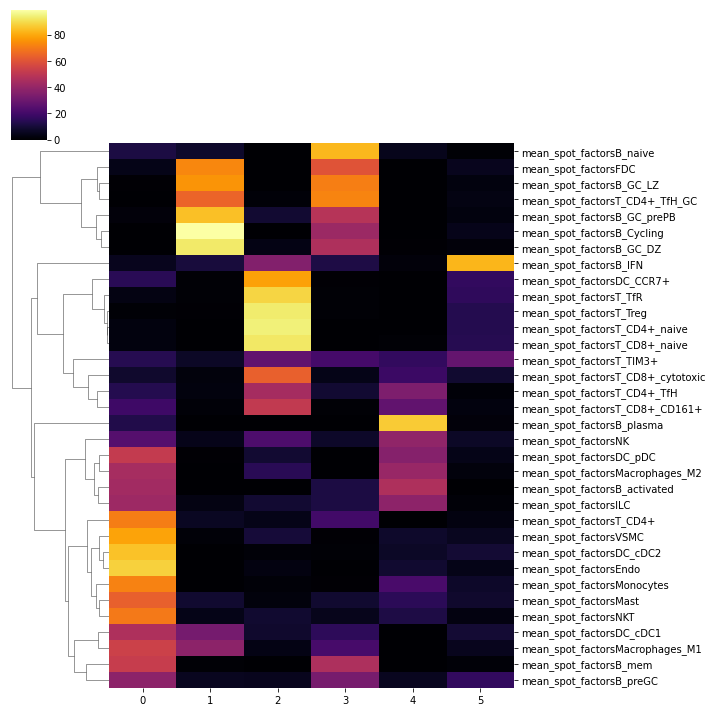

In [89]:
sns.clustermap(props, row_cluster=True, col_cluster=False, cmap='inferno', )